In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv("/content/drive/MyDrive/data (1).csv")

In [6]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


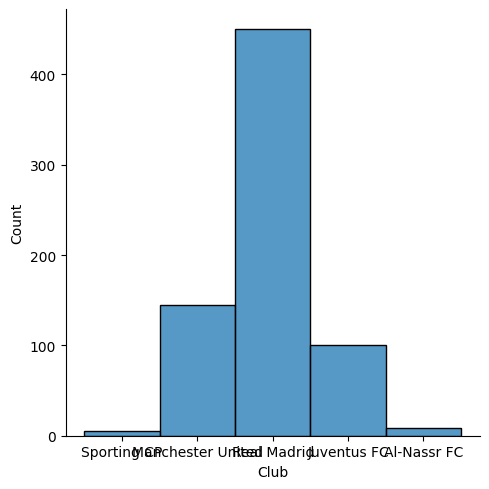

In [7]:
sns.displot(df['Club']);

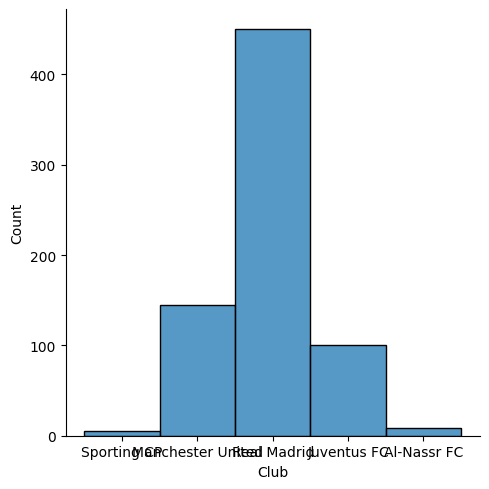

In [8]:
sns.displot(df['Club'],kde=False);

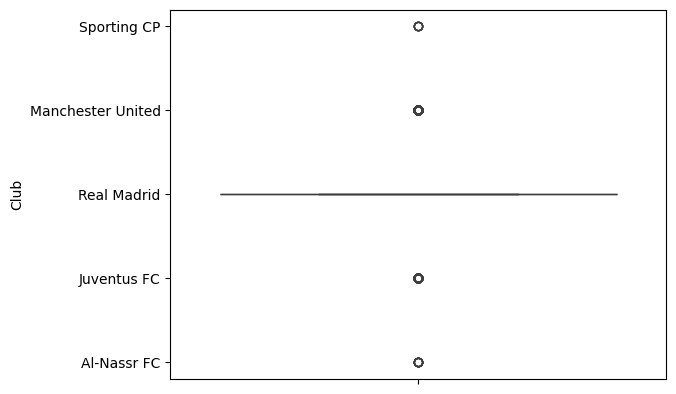

In [9]:
sns.boxplot(df['Club']);

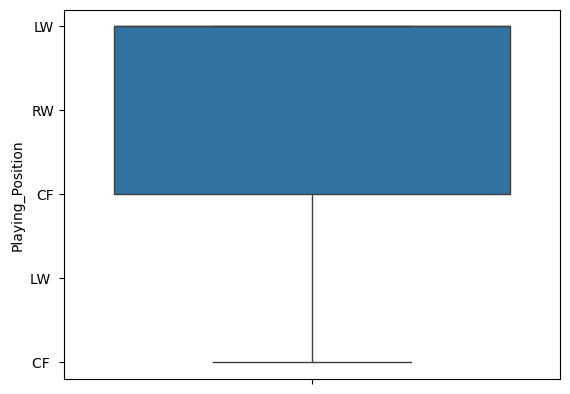

In [10]:
sns.boxplot(df['Playing_Position']);

# Bivarient analysis

## Count plot of 'Competition' for header goals

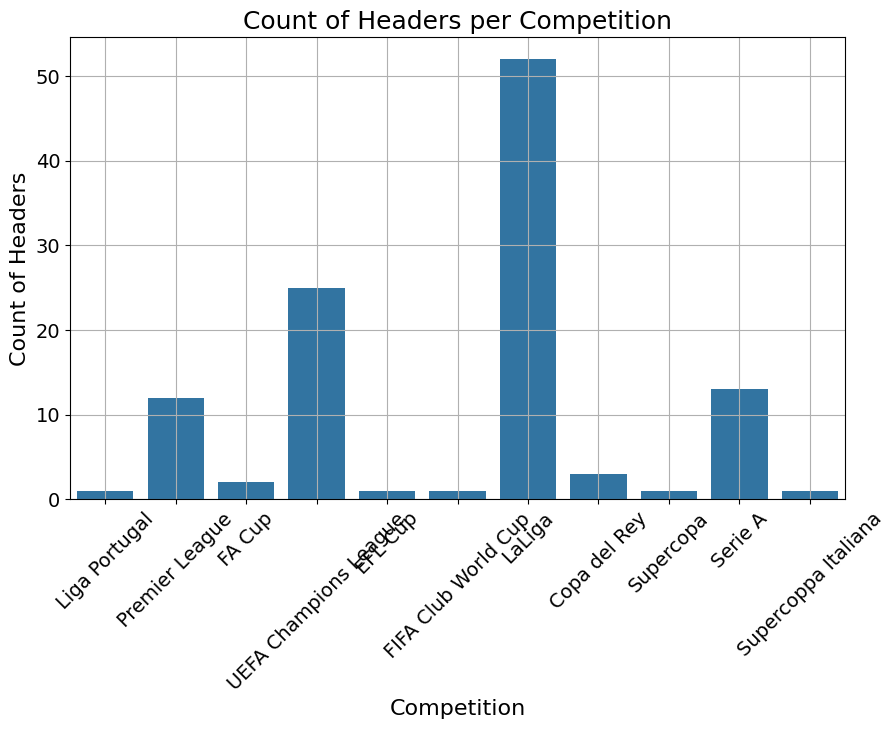

In [29]:
# Filtering only rows where 'Type' is 'Header'
header_data = df[df['Type'] == 'Header']

# Count plot of 'Competition' for header goals
plt.figure(figsize=(10, 6))
sns.countplot(x='Competition', data=header_data)
plt.title('Count of Headers per Competition', fontsize=18)  # Adjusted title font size
plt.xlabel('Competition', fontsize=16)  # Adjusted x-axis label font size
plt.ylabel('Count of Headers', fontsize=16)  # Adjusted y-axis label font size
plt.xticks(rotation=45, fontsize=14)  # Rotating x-ticks for better readability and adjusting font size
plt.yticks(fontsize=14)  # Adjusted font size for y-axis ticks
plt.grid(True)
plt.show()

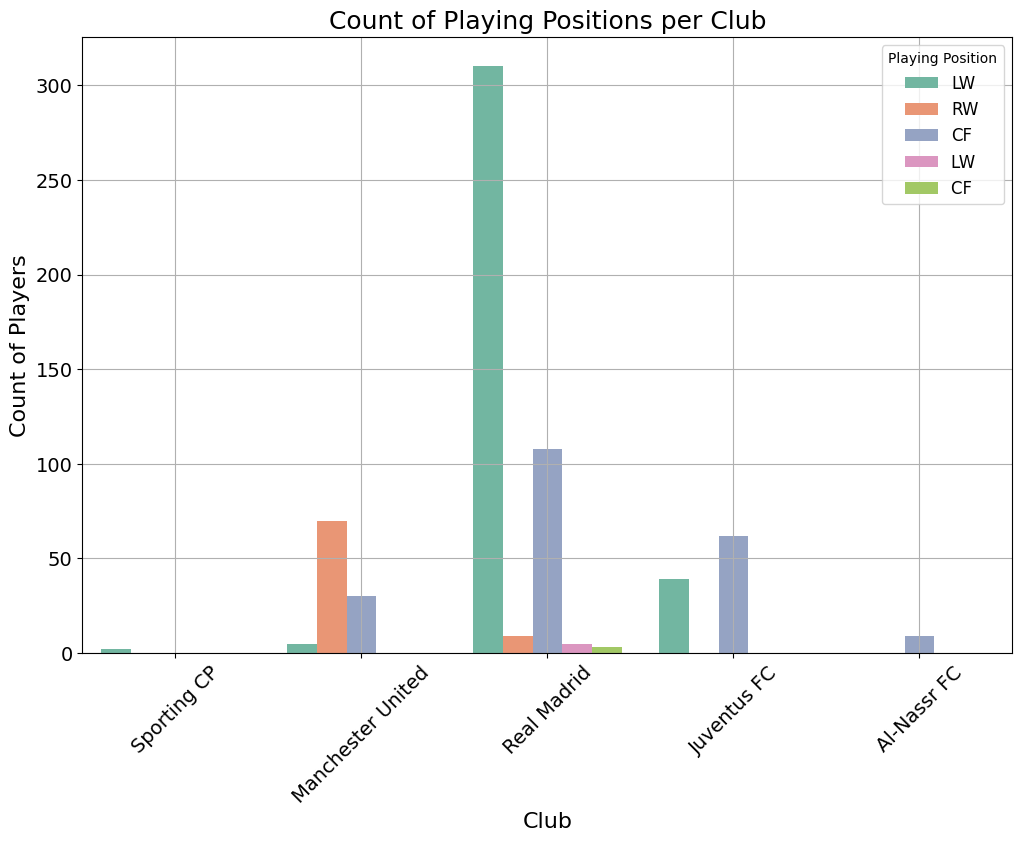

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Club', hue='Playing_Position', palette='Set2')
plt.title('Count of Playing Positions per Club', fontsize=18)  # Adjusted title font size
plt.xlabel('Club', fontsize=16)  # Adjusted x-axis label font size
plt.ylabel('Count of Players', fontsize=16)  # Adjusted y-axis label font size
plt.xticks(rotation=45, fontsize=14)  # Rotating x-ticks for better readability
plt.yticks(fontsize=14)  # Adjusted font size for y-axis ticks
plt.legend(title='Playing Position', fontsize=12)  # Adjusted legend title font size
plt.grid(True)
plt.show()

# Career Analysis

# Career Match Stats

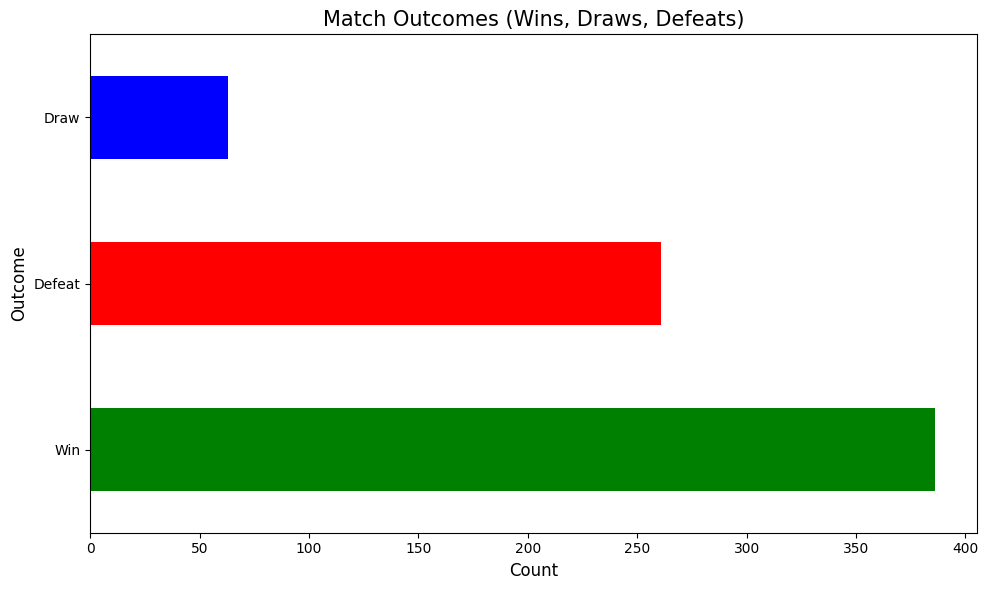

In [32]:


def get_outcome(score):
    home_score, away_score = score.split(':')
    if 'on pens' in score or 'AET' in score:
        return 'Draw'
    home_score, away_score = int(home_score), int(away_score)
    if home_score > away_score:
        return 'Win'
    elif home_score < away_score:
        return 'Defeat'
    else:
        return 'Draw'
df_new['Outcome'] = df_new['Result'].apply(get_outcome)
df_outcomes = df_new['Outcome'].value_counts().reset_index()
df_outcomes.columns = ['Outcome', 'Count']
colors = {'Win': 'green', 'Draw': 'blue', 'Defeat': 'red'}
df_outcomes['Color'] = df_outcomes['Outcome'].map(colors)
plt.figure(figsize=(10, 6))
df_outcomes.plot(kind='barh', x='Outcome', y='Count', legend=False, color=df_outcomes['Color'], ax=plt.gca())

# Add labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Outcome', fontsize=12)
plt.title('Match Outcomes (Wins, Draws, Defeats)', fontsize=15)
plt.tight_layout()
plt.show()




In [13]:
# Extract the 'Date' column into a new DataFrame
fl = df[['Date']]

# Convert the 'Date' column to datetime format and then format it as 'yy-mm-dd'
fl['Date'] = pd.to_datetime(fl['Date']).dt.strftime('%y-%m-%d')

# Get the number of rows in the 'fl' DataFrame
num_rows = len(fl)

# Create a new column 'Goal_no' which contains a range from 1 to the length of the DataFrame
fl['Goal_no'] = list(range(1, num_rows + 1))

# Create a new column 'Goal' which contains the value 1 repeated for all rows
fl['Goal'] = [1] * num_rows

# Check the result
fl.head()


,Date,Goal_no,Goal
0,02-10-07,1,1
1,02-10-07,2,1
2,02-10-26,3,1
3,02-11-24,4,1
4,02-12-18,5,1


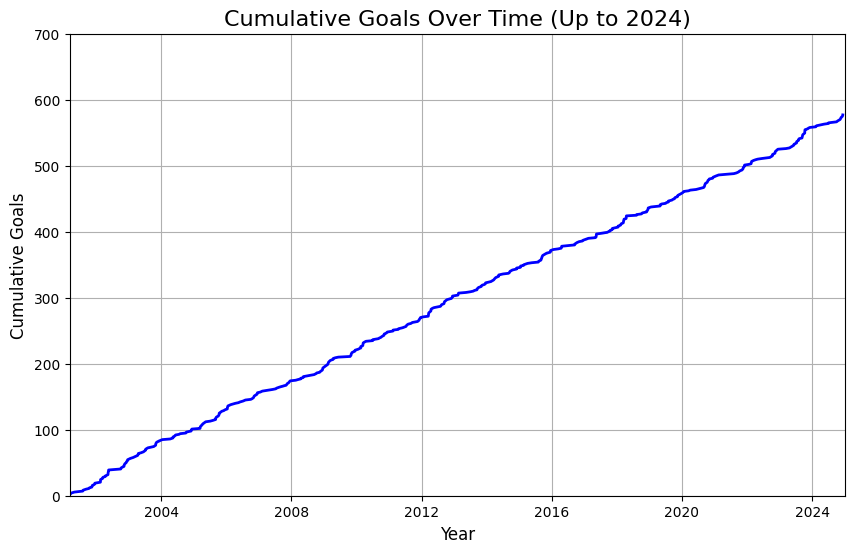

In [14]:
fl['Date'] = pd.to_datetime(fl['Date'], errors='coerce')  # Use 'coerce' to handle invalid date entries
if fl['Date'].isnull().sum() > 0:
    print("Warning: There are some invalid date entries in the dataset.")
    print(fl[fl['Date'].isnull()])
fl = fl[fl['Date'].dt.year <= 2024]
fl = fl.sort_values(by='Date')
if 'Goal' not in fl.columns:
    fl['Goal'] = 1
fl = fl.head(700)
fl['Cumulative Goals'] = fl['Goal'].cumsum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=fl['Date'], y=fl['Cumulative Goals'], color='blue', linewidth=2)
plt.title('Cumulative Goals Over Time (Up to 2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Goals', fontsize=12)
plt.grid(True)
plt.xlim(fl['Date'].min(), pd.Timestamp('2024-12-31'))
plt.ylim(0, 700)
plt.show()
